<img src="Assets/feup.png" alt="Drawing" style="float : left; width: 200px;"/>

Temática 4: Aprendizagem Supervisionada - Regressão
==================================================
## Coronavirus Disease (COVID-19) Situation Reports

### Entrega final

### Inteligência Artificial(IART) - 3º ano Mestrado em Engenharia Informática e Computação

#### Autores:
&nbsp; Cláudia Martins - up201704136

&nbsp; Andreia Gouveia - up201706430

&nbsp; Filipa Senra    - up201704077

## Introdução

O presente trabalho tem como finalidade exporar os Modelos de Regressão da Aprendizagem Supervisonada. O tema que nos foi Proposto é a Temática sobre a **Situação do Covid-19** em várias Regiões. Deste modo, pretendemos prever o número de Novos Casos e Mortes num dado Dia (após o 1º caso ter sido reportado na região). 
O relatório está organizado em 5 partes. Na Parte 1, será feita um Descrição do Problema, descrevendo os *Data Sets* utilizados para a aplicação dos vários algoritmos. Na Parte 2, será abordado a Resolução da Problemática, sendo apresentados os passos realizados para a solução do problema. Na Parte 3, serão avaliados os Resultados Obtidos pela Solução Encontrada, através de Gráficos mostrando tanto os resultados obtidos, bem como o erro associado a estes. Na Parte 4, serão apresentadas as Conclusões elencadas através do Resultados Experimentais Obtidos.

## Descrição do Problema

Foram utilizados neste trabalho dois *Data Sets* que podem ser encontrados [aqui](https://www.kaggle.com/imdevskp/corona-virus-report) e [aqui](https://www.kaggle.com/fernandol/countries-of-the-world).

O primeiro *Data Set* é composto pelas informações sobre o desenvolvimento dos casos de Covid-19.
Cada linha é composta por Província/Estado, País/Região, Latitude, Longitude, Data, Casos Confirmados, Mortes e Recuperados. Optamos por não usar as colunas da Latitude e Longitude e agrupar o número de Casos Confirmados, Mortes e Recuperados por País. Foi, de igual modo, criada uma nova coluna que representa o número de dias desde que o 1º caso ocorreu no País/Região. Deste modo, a coluna Data, também, não foi utilizada. Foi, também, adicionado o Número de Novos Casos, Mortos e Recuperados do dia anterior.

O segundo *Data Set* é composto pelas informações demográficas de cada País. Optamos por usar as colunas: Taxa de Mortalidade, Taxa de Mortalidade Infantil, Produto Interno Bruto *per capita*, Número de Habitantes e a Densidade Populacional. Escolhemos incluir a Taxa de Mortalidade Infantil e a Taxa Mortalidade, pois são reconhecidas como boas métricas sobre o Estado de Desenvolvimento de um País bem como a qualidade da Saúde no País. O Produto Interno Bruto *per capita* foi utilizado, pois países mais ricos poderão encarar a doença com mais meios. A Densidade Populational foi utilizada, pois a transmidação do Covid-19 é maior em zonas mais densamente populacionadas. A Número de Habitantes foi utilizado, pois possui uma forte corrulação entre o número de casos de Covid-19.

A partir destes dois *Data Sets* foi construido um final que agrupa todas as informações. Cada linha é composta por: País/Região, Número de Habitantes, Densidade Populacional, Produto Interno Bruto *per capita*, Taxa de Mortalidade, Taxa de Mortalidade Infantil, Número de Dias desde o 1º Caso Reportado na Região, Número de Novos Casos Confirmados, Número de Novas Mortes Confirmadas, Número de Novos Recuperados, Número de Novos Casos do Dia Anterior, Número de Mortos do Dia Anterior e Número de Recuperados do Dia Anterior.

## Abordagem

Tanto os *Data Sets* de treino como de Teste foram extraídos *Data Set* obtido anteiormente. Esta extração foi feita de forma aleatória, recorrendo à função *train_test_split* com os pârametros *test_size* a 0.2 e o *random_state* a 0. Assim,

### Construção do *Data Set* a ser utilizado

#### Depências e Bibliotecas a ser utilizadas

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing as pre
from sklearn.datasets import make_regression
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.simplefilter("ignore", category=ConvergenceWarning)
import matplotlib.pyplot as plt
import seaborn as sb

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


/home/andreiagouveia23/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


#### 1. Importação do *Data Set* com os Dados Relativos ao Covid-19

In [2]:
covid_data = pd.read_csv('covid_19_clean_complete.csv')

In [3]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


#### 1.1 Eliminação das Colunas que não irão ser utilizadas e Passagem da Coluna "Data" para Objeto Data de *Python* 

In [4]:
covid_data.drop(['Province/State', 'Lat', 'Long'],axis=1, inplace=True)
covid_data.head()

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,1/22/20,0,0,0
1,Albania,1/22/20,0,0,0
2,Algeria,1/22/20,0,0,0
3,Andorra,1/22/20,0,0,0
4,Angola,1/22/20,0,0,0


#### 1.2 Agregação dos Casos por País/Região, Eliminação das Colunas com Data anterior ao 1º Caso Reportado no País/Região

In [5]:
#aggregates de countries by date
covid_data = covid_data.groupby(['Country/Region', 'Date'])[['Confirmed', 'Deaths', 'Recovered']].apply(sum)

#eliminates rows with no suspected, no deaths and no cured
covid_data = covid_data[(covid_data.T != 0).any()] 

#get group by columns back
covid_data.reset_index(inplace=True) 

covid_data.head(10)

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2/24/20,1,0,0
1,Afghanistan,2/25/20,1,0,0
2,Afghanistan,2/26/20,1,0,0
3,Afghanistan,2/27/20,1,0,0
4,Afghanistan,2/28/20,1,0,0
5,Afghanistan,2/29/20,1,0,0
6,Afghanistan,3/1/20,1,0,0
7,Afghanistan,3/10/20,5,0,0
8,Afghanistan,3/11/20,7,0,0
9,Afghanistan,3/12/20,7,0,0


#### 1.3 Uniformalização dos Nomes dos Países e Eliminação de Regiões/Países Não Válidos

In [6]:
#get countries present in covid data and removing trailing white spaces
covid_data_country_unique = covid_data['Country/Region'].drop_duplicates().str.strip()
pd.set_option('display.max_rows', covid_data_country_unique.shape[0]+1)
print(covid_data_country_unique)

#deleting rows with missing data
covid_data.dropna(inplace=True)

0                             Afghanistan
74                                Albania
134                               Algeria
207                               Andorra
274                                Angola
323                   Antigua and Barbuda
379                             Argentina
445                               Armenia
513                             Australia
616                               Austria
689                            Azerbaijan
757                               Bahamas
810                               Bahrain
884                            Bangladesh
945                              Barbados
997                               Belarus
1067                              Belgium
1161                               Belize
1207                                Benin
1260                               Bhutan
1323                              Bolivia
1381               Bosnia and Herzegovina
1445                             Botswana
1484                              

#### 2. Importação do *Data Set* com os Dados Demográficos dos Países

In [7]:
countries_data = pd.read_csv('countries_data.csv', decimal=',')

#### 2.1 Eliminação das Colunas que não irão ser utilizadas e de Linhas com Valores em Falta

In [8]:
#deleting useless columns from countries data
countries_data.drop(['Region', 'Net migration', 'Area (sq. mi.)','Coastline (coast/area ratio)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)','Crops (%)','Other (%)','Climate','Birthrate','Agriculture','Industry','Service'],axis=1, inplace=True)

#deleting countries with missing data
countries_data.dropna(inplace=True)

#### 2.2 Visualização das Diferenças de Países entre os "DataSets*

In [9]:
#removing trailing white spaces
countries_data_country = countries_data['Country'].str.strip()

#replacing & for and
countries_data_country.replace({'&': 'and'}, inplace=True, regex=True)

#get series with all the countries present in both data sets
df = pd.concat([covid_data_country_unique,countries_data_country])

#drop values that are repeated (keep the unique values)
unique_values = df.drop_duplicates(keep=False)

#sort them for an easy read
unique_values = unique_values.sort_values()

pd.set_option('display.max_rows', unique_values.shape[0]+1)
print(unique_values)

3                  American Samoa
6                        Anguilla
10                          Aruba
757                       Bahamas
14                   Bahamas, The
22                        Bermuda
28             British Virgin Is.
1816                   Cabo Verde
37                     Cape Verde
38                 Cayman Islands
39           Central African Rep.
2133     Central African Republic
2481          Congo (Brazzaville)
2535             Congo (Kinshasa)
45               Congo, Dem. Rep.
46           Congo, Repub. of the
53                 Czech Republic
2904                      Czechia
3043             Diamond Princess
58                     East Timor
3675                     Eswatini
66                  Faroe Islands
70                  French Guiana
71               French Polynesia
4096                       Gambia
73                    Gambia, The
74                     Gaza Strip
78                      Gibraltar
80                      Greenland
82            

#### 2.3 Uniformazição dos Nomes dos Países nos Dois *Data Sets*

In [10]:
#particular cases
countries_data_country.replace({'Taiwan': 'Taiwan*'}, inplace=True, regex=True)
countries_data_country.replace({'Macedonia': 'North Macedonia'}, inplace=True, regex=True)
countries_data_country.replace({'Korea, South': 'South Korea'}, inplace=True, regex=True)
countries_data_country.replace({'United States': 'US'}, inplace=True, regex=True)
countries_data_country.replace({'Gambia, The': 'Gambia'}, inplace=True, regex=True)
countries_data_country.replace({'American Samoa': 'Samoa'}, inplace=True, regex=True)
countries_data_country.replace({'Czech Republic': 'Czechia'}, inplace=True, regex=True)
countries_data_country.replace({'Swaziland': 'Eswatini'}, inplace=True, regex=True)
countries_data_country.replace({'East Timor': 'Timor-Leste'}, inplace=True, regex=True)
countries_data_country.replace({'Bahamas, The': 'Bahamas'}, inplace=True, regex=True)
countries_data_country.replace({'Cape Verde': 'Cabo Verde'}, inplace=True, regex=True)
countries_data_country.replace({'Central African Rep.': 'Central African Republic'}, inplace=True, regex=True)
countries_data_country.replace({'Congo, Dem. Rep.': 'Congo (Kinshasa)'}, inplace=True, regex=True)
countries_data_country.replace({'Congo, Repub. of the': 'Congo (Brazzaville)'}, inplace=True, regex=True)

#replacing the column with the country names with the revised column
countries_data_df = pd.DataFrame(countries_data)
countries_data_country_df = pd.DataFrame(countries_data_country)
new_countries_data_df = countries_data_df.assign(Country=countries_data_country_df['Country'])

#### 2.4 Eliminação dos Países/Regiões sem Correspondência nos Dois *Data Sets*

In [11]:
#eliminating countries from the countries_data that are not in the covid_data
countries_data = new_countries_data_df

for x in unique_values:
  countries_data.drop(countries_data[countries_data['Country'] == x ].index , inplace=True)
  covid_data.drop(covid_data[covid_data['Country/Region'] == x ].index , inplace=True)

#### 2.5 Exportação dos *Data Sets* indivíduais limpos

In [12]:
#Saving cleaned data_set into to a file
countries_data.to_csv('countries_data_clean.csv')
covid_data.to_csv('covid_data_clean.csv')

#### 3. Junção dos Dois *Data Sets*

#### 3.1 Junção dos Países em Linhas com todas as Informações

In [13]:
#Merge the two columns together and drop uncessary columns
merged_inner = pd.merge(left=covid_data, right=countries_data, left_on='Country/Region', right_on='Country').drop(columns=['Country'])

#Drop rows with at least one missing value
merged_inner.dropna(inplace=True)

merged_inner.head(50)

,Country/Region,Date,Confirmed,Deaths,Recovered,Population,Pop. Density (per sq. mi.),Infant mortality (per 1000 births),GDP ($ per capita),Deathrate
0,Afghanistan,2/24/20,1,0,0,31056997,48.0,163.07,700.0,20.34
1,Afghanistan,2/25/20,1,0,0,31056997,48.0,163.07,700.0,20.34
2,Afghanistan,2/26/20,1,0,0,31056997,48.0,163.07,700.0,20.34
3,Afghanistan,2/27/20,1,0,0,31056997,48.0,163.07,700.0,20.34
4,Afghanistan,2/28/20,1,0,0,31056997,48.0,163.07,700.0,20.34
5,Afghanistan,2/29/20,1,0,0,31056997,48.0,163.07,700.0,20.34
6,Afghanistan,3/1/20,1,0,0,31056997,48.0,163.07,700.0,20.34
7,Afghanistan,3/10/20,5,0,0,31056997,48.0,163.07,700.0,20.34
8,Afghanistan,3/11/20,7,0,0,31056997,48.0,163.07,700.0,20.34
9,Afghanistan,3/12/20,7,0,0,31056997,48.0,163.07,700.0,20.34


#### 3.2 Criação de Nova Coluna que Representa os Dias Decorridos desde o 1º Caso Reportado, Criação de Colunas com os Dados do Dia Anterior

In [14]:
#get group by columns back
merged_inner.reset_index(inplace=True) 
merged_inner['Date'] = pd.to_datetime(merged_inner['Date'])

#substructs the mim date from the current date (and returns the result in days - dt.days)
merged_inner['Ellapsed Days'] = (merged_inner['Date'] - merged_inner.groupby('Country/Region')['Date'].transform('min')).dt.days


def createPrevValues(dataset, originalColumnName, commonColumnName, newColumnName):
    dataset[newColumnName] = dataset.loc[dataset[commonColumnName].shift(-1)==dataset[commonColumnName], originalColumnName]
    dataset[newColumnName] = dataset[newColumnName].shift()
    dataset[newColumnName].fillna(0, inplace=True)

def createPrevValuesCum(dataset, originalColumnName, commonColumnName, newColumnName, sortColumnName):
    dataset[newColumnName] = dataset.sort_values(sortColumnName)\
    .groupby([commonColumnName])[originalColumnName].cumsum() - dataset[originalColumnName]
    
#Get cases of previous day
createPrevValues(merged_inner, 'Confirmed', 'Country/Region', 'Prev_Confirmed')

#Get deaths of previous day
createPrevValues(merged_inner, 'Deaths', 'Country/Region', 'Prev_Deaths')

#Get Recovered of previous day
createPrevValues(merged_inner, 'Recovered', 'Country/Region', 'Prev_Recovered')

#Get cases of previous day
createPrevValuesCum(merged_inner, 'Confirmed', 'Country/Region', 'Prev_Confirmed_Cum', 'Ellapsed Days')

#Get deaths of previous day
createPrevValuesCum(merged_inner, 'Deaths', 'Country/Region', 'Prev_Deaths_Cum', 'Ellapsed Days')

#Get Recovered of previous day
createPrevValuesCum(merged_inner, 'Recovered', 'Country/Region', 'Prev_Recovered_Cum', 'Ellapsed Days')

merged_inner.drop(columns=['Date', 'index'], inplace=True)
merged_inner.sort_values(by=['Country/Region', 'Ellapsed Days'], inplace=True)

merged_inner.dropna(inplace=True)

merged_inner.head(50)

,Country/Region,Confirmed,Deaths,Recovered,Population,Pop. Density (per sq. mi.),Infant mortality (per 1000 births),GDP ($ per capita),Deathrate,Ellapsed Days,Prev_Confirmed,Prev_Deaths,Prev_Recovered,Prev_Confirmed_Cum,Prev_Deaths_Cum,Prev_Recovered_Cum
0,Afghanistan,1,0,0,31056997,48.0,163.07,700.0,20.34,0,0.0,0.0,0.0,0,0,0
1,Afghanistan,1,0,0,31056997,48.0,163.07,700.0,20.34,1,1.0,0.0,0.0,1,0,0
2,Afghanistan,1,0,0,31056997,48.0,163.07,700.0,20.34,2,1.0,0.0,0.0,2,0,0
3,Afghanistan,1,0,0,31056997,48.0,163.07,700.0,20.34,3,1.0,0.0,0.0,3,0,0
4,Afghanistan,1,0,0,31056997,48.0,163.07,700.0,20.34,4,1.0,0.0,0.0,4,0,0
5,Afghanistan,1,0,0,31056997,48.0,163.07,700.0,20.34,5,1.0,0.0,0.0,5,0,0
6,Afghanistan,1,0,0,31056997,48.0,163.07,700.0,20.34,6,1.0,0.0,0.0,6,0,0
17,Afghanistan,1,0,0,31056997,48.0,163.07,700.0,20.34,7,22.0,0.0,1.0,7,0,0
28,Afghanistan,1,0,0,31056997,48.0,163.07,700.0,20.34,8,120.0,4.0,2.0,8,0,0
31,Afghanistan,1,0,0,31056997,48.0,163.07,700.0,20.34,9,174.0,4.0,5.0,9,0,0


# TODO: check with graphs the outliers

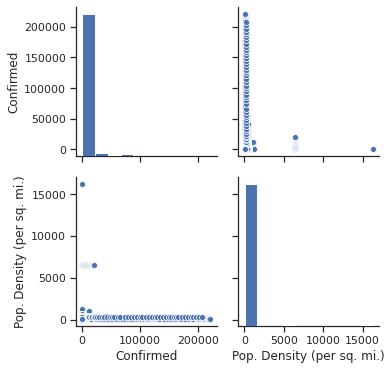

In [15]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

g = sns.pairplot(merged_inner, vars=["Confirmed", "Pop. Density (per sq. mi.)"])

#### 3.3 Exportação do *Data Set* final

In [16]:
merged_inner.to_csv('covid_and_country_data.csv')

### Obtenção dos Valores que os Modelos irão receber

In [17]:
#Get set with the values that the model receives
X = merged_inner.drop(columns=[ 'Country/Region', 'Confirmed', 'Deaths', 'Recovered'])

#Values the model should predict
y = merged_inner[['Confirmed', 'Deaths']]


#Setting up training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Decision Tree Regression

In [18]:
def perfomeTestAndShowBars(models, captions, title): 
    
    error_values = []

    for model in models:
    
        model.fit(X_train, y_train)
    
        #Predicting
        y_pred = model.predict(X_test)
    
        mean_var = (merged_inner.describe()['Confirmed'].loc['mean'] + merged_inner.describe()['Deaths'].loc['mean'])/2
    
        acc_score = metrics.mean_absolute_error(y_test, y_pred)*100/mean_var
        
        # Record testing score
        error_values.append(acc_score)    
    
    # allows plots to appear within the notebook
    %matplotlib inline

    import matplotlib.ticker as ticker
    # Shows Only RMSE

    ind = np.arange(len(models))  # the x locations for the groups
    width = 0.85  # the width of the bars
    sns.set_style("darkgrid")

    y_pos = np.arange(len(captions))

    plt.figure(figsize=(10, 6))
    plt.bar(y_pos, error_values, align='center', alpha=0.5)
    plt.xticks(y_pos, captions)
    plt.ylabel('Relative Error')
    plt.title(title)

    plt.show()


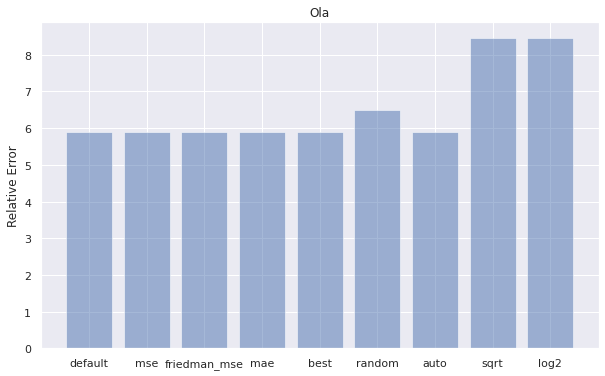

In [19]:
dtr_default = DecisionTreeRegressor(random_state = 0)

dtr_mse = DecisionTreeRegressor(criterion='mse', random_state = 0)
dtr_friedman = DecisionTreeRegressor(criterion='friedman_mse', random_state = 0)
dtr_mae = DecisionTreeRegressor(criterion='mae', random_state = 0)

dtr_best = DecisionTreeRegressor(splitter='best', random_state = 0)
dtr_random = DecisionTreeRegressor(splitter='random', random_state = 0)

dtr_auto = DecisionTreeRegressor(max_features='auto', random_state = 0)
dtr_sqrt = DecisionTreeRegressor(max_features='sqrt', random_state = 0)
dtr_log2 = DecisionTreeRegressor(max_features='log2', random_state = 0)

dtrModels = [dtr_default, dtr_mse, dtr_mse, dtr_mse, dtr_best, dtr_random, dtr_auto, dtr_sqrt, dtr_log2]
    
perfomeTestAndShowBars(dtrModels, ('default', 'mse', 'friedman_mse', 'mae', 'best', 'random', 'auto', 'sqrt', 'log2'), 'Criterion/Splitter/Max_features')

In [20]:
def perfomeTestAndShow(c_parameter_name, c_parameter_values):

    df = pd.DataFrame(columns=[c_parameter_name, 'Erro Relativo'])
    
    for input_parameter in c_parameter_values:
        
        if c_parameter_name == 'max_depth':
            model = DecisionTreeRegressor(max_depth=input_parameter, random_state=0)
        elif c_parameter_name == 'min_samples_split':
            model = DecisionTreeRegressor(min_samples_split=input_parameter, random_state=0)
        elif c_parameter_name == 'min_samples_leaf':
            model = DecisionTreeRegressor(min_samples_leaf=input_parameter, random_state=0)
        elif c_parameter_name == 'max_leaf_nodes':
            model = DecisionTreeRegressor(max_leaf_nodes=input_parameter, random_state=0)
        elif c_parameter_name == 'min_impurity_decrease':
            model = DecisionTreeRegressor(min_impurity_decrease=input_parameter, random_state=0)
        elif c_parameter_name == 'n_neighbors':
            model = neighbors.KNeighborsRegressor(n_neighbors=input_parameter)
        elif c_parameter_name == 'p':
            model = neighbors.KNeighborsRegressor(p=input_parameter)
        elif c_parameter_name == 'max_iter':
            model = MLPRegressor(max_iter=input_parameter, solver='lbfgs', random_state=0) 
        elif c_parameter_name == 'alpha':
            model = MLPRegressor( alpha=input_parameter, solver='lbfgs', random_state=0)
        
        model.fit(X_train, y_train)


        y_pred = model.predict(X_test)
        
        mean_var = (merged_inner.describe()['Confirmed'].loc['mean'] + merged_inner.describe()['Deaths'].loc['mean'])/2
    
        acc_score = metrics.mean_absolute_error(y_test, y_pred)*100/mean_var
    
        df = df.append({c_parameter_name : input_parameter , 'Erro Relativo' : acc_score}, ignore_index=True)
    
    print(df)
    print("")

    plt.figure(figsize=(12,6))
    sns.pointplot(x=c_parameter_name, y="Erro Relativo", data=df)
    title = 'Model Erro Relativo(%) vs ' + c_parameter_name + ' parameter'
    plt.title(title)
    plt.xticks(rotation= 90)
    plt.grid()

    max_depth  Erro Relativo
0         1.0      78.327372
1         2.0      45.213521
2         3.0      28.256332
3         4.0      19.804994
4         5.0      13.986540
5         6.0      11.517217
6         7.0      10.201598
7         8.0       8.280625
8         9.0       7.576112
9        10.0       6.650405
10       11.0       6.167202
11       12.0       6.111991
12       13.0       6.116027
13       14.0       5.984881
14       15.0       6.123332
15       20.0       6.125205



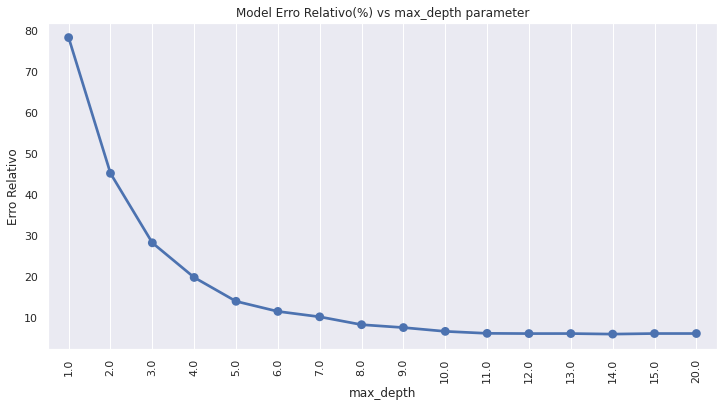

In [21]:
perfomeTestAndShow('max_depth', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 20])

Ao analisar o gráfico concluímos que o erro relativo diminuí com o aumento do max_depth. Deste modo, não se mostra vantajoso modificar este parâmetro.

    min_samples_split  Erro Relativo
0                 5.0       6.382996
1                10.0       6.901271
2                15.0       7.254161
3                20.0       8.197658
4                25.0       8.923291
5                30.0       9.439165
6                35.0      10.387497
7                40.0      10.485535
8                45.0      10.895710
9                50.0      11.053290
10               55.0      11.053109
11               60.0      12.065972
12               65.0      12.216945
13               70.0      13.327123
14               75.0      13.491424
15               80.0      13.813086
16               85.0      13.878306
17               90.0      14.142893
18               95.0      14.198805
19              100.0      14.227454
20              105.0      14.293870
21              110.0      14.389667
22              115.0      15.018351
23              120.0      15.018266
24              125.0      15.056593
25              130.0      15.169232
2

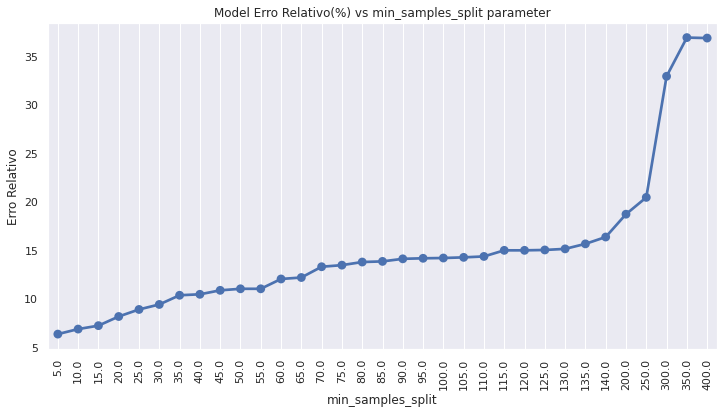

In [23]:
perfomeTestAndShow('min_samples_split', [2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,
                       100,105,110,115,120,125,130,135,140,200,250,300,350,400])

Ao analisar o gráfico concluímos que o erro relativo aumenta com o aumento do valor de min_samples_split. Deste modo optámos por utilizar o valor default deste parâmetro de 2, visto que a sua modificação não se mostra vantajosa.

    min_samples_leaf  Erro Relativo
0                1.0       5.907438
1                2.0       6.365246
2                3.0       6.332004
3                4.0       6.784461
4                5.0       6.999412
5               10.0       9.655807
6               15.0      10.531146
7               20.0      11.475059
8               25.0      12.100437
9               30.0      13.320358
10              35.0      15.235252
11              40.0      16.509261
12              45.0      16.801335
13              50.0      16.997296
14              55.0      17.471594



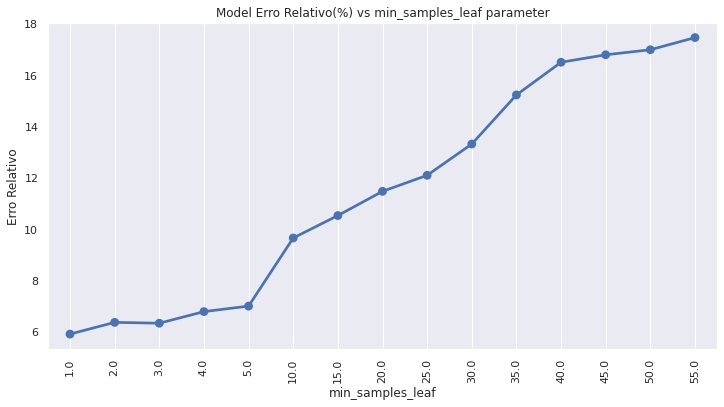

In [25]:
perfomeTestAndShow('min_samples_leaf', [1, 2, 3, 4, 5,10,15,20,25,30,35,40,45,50,55])

Ao analisar o gráfico concluímos que o erro relativo aumenta com o aumento do valor de min_samples_leaf. Deste modo optámos por utilizar o valor default deste parâmetro de 1, visto que a sua alteração não se mostra vantajosa.

    max_leaf_nodes  Erro Relativo
0              2.0      78.327372
1              3.0      66.063864
2              4.0      45.213521
3              5.0      45.091648
4              6.0      41.082738
5              7.0      39.067388
6              8.0      28.256332
7              9.0      27.553246
8             10.0      27.672881
9             11.0      27.350328
10            12.0      25.705542
11            13.0      24.844263
12            14.0      24.530193
13            15.0      23.382620
14            16.0      23.153864
15            17.0      19.413684
16            18.0      18.717618
17            19.0      18.120405
18            20.0      17.906248



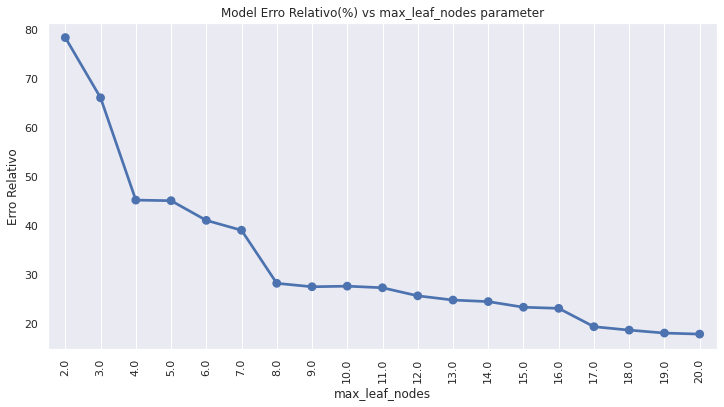

In [27]:
perfomeTestAndShow('max_leaf_nodes', [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

Ao analisar o gráfico concluímos que o erro relativo diminuí com o aumento do valor de min_leaf_nodes. Deste modo optámos por utilizar o valor default deste parâmetro de NULL, visto que a sua modificação não se mostra vantajosa.

   min_impurity_decrease  Erro Relativo
0                0.00005       5.856692
1                0.00010       6.113028
2                0.00020       5.599031
3                0.00050       6.180473
4                0.00100       5.947299
5                0.00150       6.151118
6                0.00200       5.808178
7                0.00500       5.928785
8                0.01000       5.912094



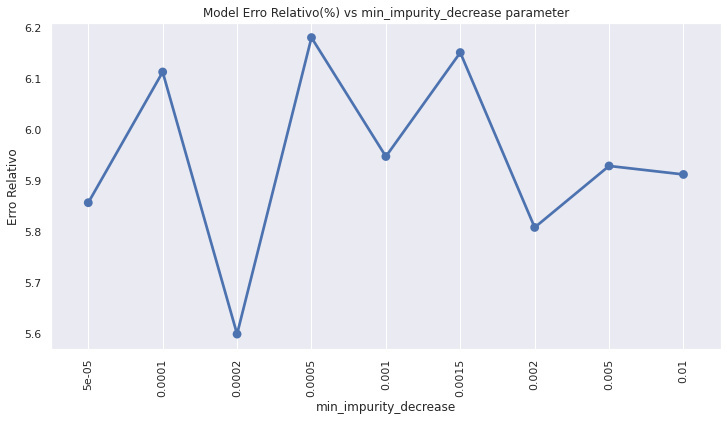

In [29]:
perfomeTestAndShow('min_impurity_decrease', [0.00005,0.0001,0.0002,0.0005,0.001,0.0015,0.002,0.005,0.01])

Ao analisar o gráfico foi possível concluir que quando o parâmetro min_impurity_decrease assume o valor de 0.0002, origina um erro relativo menor. Visto isto, é vantajoso mudar o valor deste parâmetro para 0.0002.

### Nearest Neighbors Regression

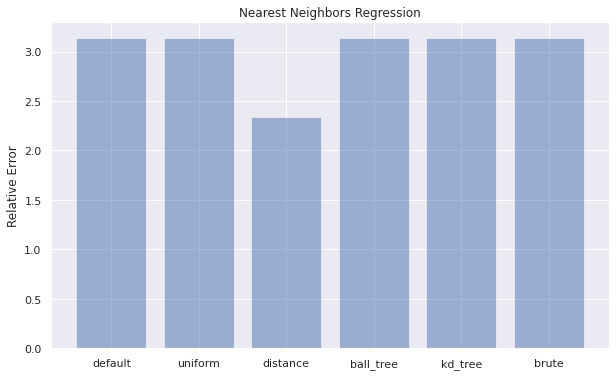

In [31]:
knr_default = KNeighborsRegressor()

knr_uni = KNeighborsRegressor(weights='uniform')
knr_dist = KNeighborsRegressor(weights='distance')
knr_btree = KNeighborsRegressor(algorithm='ball_tree')
knr_ktree = KNeighborsRegressor(algorithm='kd_tree')
knr_brute = KNeighborsRegressor(algorithm='brute')

dtrModels = [knr_default, knr_uni, knr_dist, knr_btree, knr_ktree, knr_brute]
    
perfomeTestAndShowBars(dtrModels, ('default', 'uniform', 'distance', 'ball_tree', 'kd_tree', 'brute'), 'Nearest Neighbors Regression')

Ao analisar o gráfico concluímos que quando o parâmetro weights assume o valor distance, resulta num erro muito inferior em relação a todos os outros valores possiveís. Visto isto, optámos por utilizar o valor distance neste parâmetro.

   n_neighbors  Erro Relativo
0          1.0       3.477885
1          2.0       2.046987
2          3.0       2.455181
3          5.0       3.138824
4          6.0       3.407272
5          7.0       4.127142
6          8.0       5.154988
7          9.0       5.967324
8         10.0       6.756262
9         15.0      12.187901



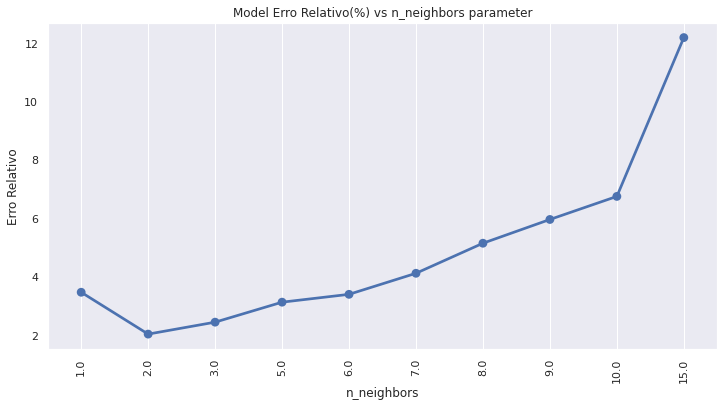

In [33]:
perfomeTestAndShow('n_neighbors',[1 , 2 , 3 , 5 , 6, 7, 8, 9, 10 , 15])

Ao analisar o gráfico concluímos que quando o parâmetro n_neighbors assume o valor de 2.0, resulta num erro relativo muito inferior em relação a todos os outros valores testados. Visto isto, optámos por utilizar o valor 2 neste parâmetro.

      p  Erro Relativo
0   1.0       3.236387
1   2.0       3.138824
2   3.0       3.209766
3   5.0       3.258566
4   6.0       3.280905
5   7.0       3.276260
6   8.0       3.281228
7   9.0       3.285287
8  10.0       3.283341
9  15.0       3.320001



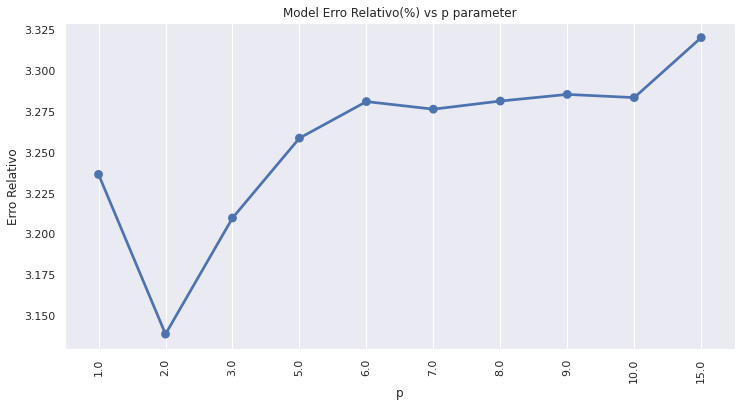

In [35]:
perfomeTestAndShow('p',[1 , 2 , 3 , 5 , 6, 7, 8, 9, 10 , 15])

Ao analisar o gráfico concluímos que quando o parâmetro p assume o valor de 2.0, resulta num erro relativo muito inferior em relação a todos os outros valores testados. Visto isto, optámos por utilizar o valor default neste parâmetro.

### Neural Network Regression

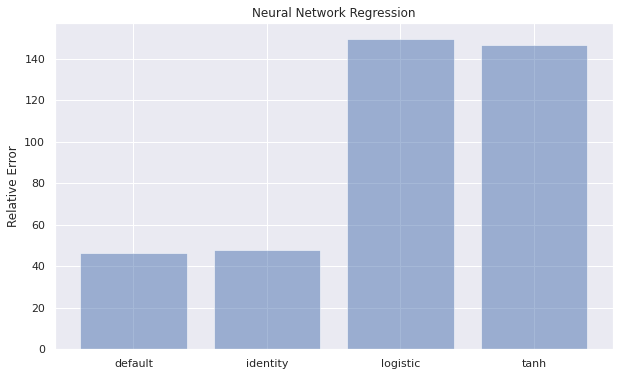

In [37]:
mlpr_default = MLPRegressor(solver='lbfgs', random_state=0)

mlpr_identity = MLPRegressor(activation='identity', solver='lbfgs', random_state=0)
mlpr_logistic = MLPRegressor(activation='logistic', solver='lbfgs', random_state=0)
mlpr_tahn = MLPRegressor(activation='tanh', solver='lbfgs', random_state=0)

mlprModels = [mlpr_default, mlpr_identity, mlpr_logistic, mlpr_tahn]

perfomeTestAndShowBars(mlprModels, ('default', 'identity', 'logistic', 'tanh'), 'Neural Network Regression')

Ao analisar o gráfico concluímos que quando o parâmetro activation assume o valor de default, resulta num erro relativo muito inferior em relação a todos os outros valores testados. Visto isto, optámos por utilizar o valor default neste parâmetro.

   max_iter  Erro Relativo
0      50.0      77.945898
1     100.0      54.146731
2     150.0      51.491973
3     200.0      46.270490
4     250.0      41.985331
5     300.0      37.028473
6     350.0      35.832528



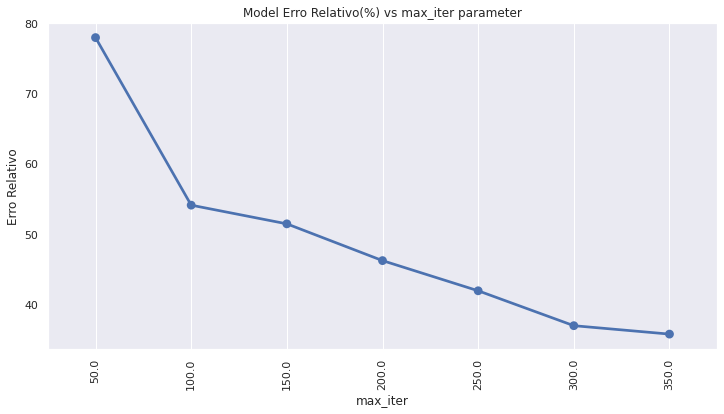

In [39]:
perfomeTestAndShow('max_iter', [50, 100, 150, 200, 250 , 300, 350])

Ao analisar o gráfico concluímos que quando o parâmetro max_iter assume o valor de default, resulta num erro relativo muito inferior em relação a todos os outros valores testados. Visto isto, optámos por utilizar o valor default neste parâmetro.

     alpha  Erro Relativo
0  0.00001      46.186932
1  0.00010      46.270490
2  0.00100      46.411127
3  0.01000      47.072886



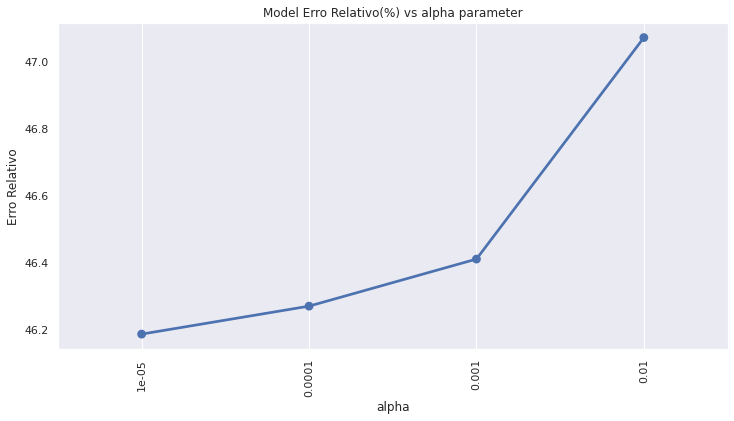

In [41]:
perfomeTestAndShow('alpha', [0.00001 , 0.0001 , 0.001 , 0.01])

Ao analisar o gráfico concluímos que o erro relativo aumenta com o aumento do valor do parâmetro alpha. Visto isto, decidimos usar o valor de 1e-05.

### Comparação de Algoritmos

#### Decision Tree Regression

In [44]:
dtr = DecisionTreeRegressor(min_impurity_decrease = 0.0002)
neuralnr = MLPRegressor(solver='lbfgs', random_state=0)
nnr = KNeighborsRegressor()

dtr.fit(X_train, y_train)
neuralnr.fit(X_train, y_train)
nnr.fit(X_train, y_train)
    
#Predicting
dtr_pred = model.predict(X_test)
    
mean_var = (merged_inner.describe()['Confirmed'].loc['mean'] + merged_inner.describe()['Deaths'].loc['mean'])/2
    
acc_score = metrics.mean_absolute_error(y_test, y_pred)*100/mean_var
        
# Record testing score
error_values.append(acc_score)    
# allows plots to appear within the notebook
%matplotlib inline

import matplotlib.ticker as ticker
# Shows Only RMSE

ind = np.arange(len(models))  # the x locations for the groups
width = 0.85  # the width of the bars
sns.set_style("darkgrid")

y_pos = np.arange(len(captions))

plt.figure(figsize=(10, 6))
plt.bar(y_pos, error_values, align='center', alpha=0.5)
plt.xticks(y_pos, captions)
plt.ylabel('Relative Error')
plt.title(title)

plt.show()


NameError: name 'model' is not defined